In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../input/heart_folds.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,kfold
0,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0,0
1,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0,0
2,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0,0
3,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1,0
4,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'kfold'],
      dtype='object')

In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,kfold
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,1.990099
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,1.415349
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,4.000000


<AxesSubplot:>

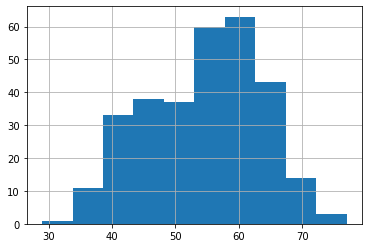

In [5]:
df.age.hist()

<AxesSubplot:>

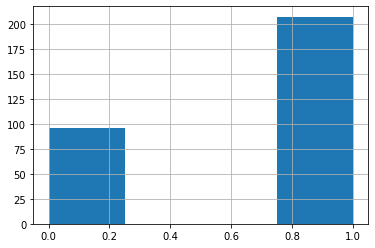

In [6]:
df.sex.hist(bins=4)

<AxesSubplot:>

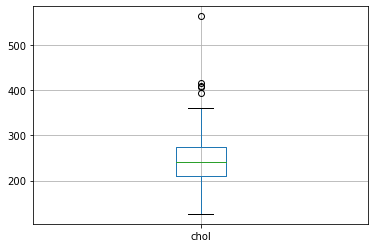

In [7]:
df.boxplot(column = 'chol')

In [8]:
# Correlations between continuous variables without seaborn
df[['age','chol', 'trtbps', 'thalachh']].corr()

,age,chol,trtbps,thalachh
age,1.000000,0.213678,0.279351,-0.398522
chol,0.213678,1.000000,0.123174,-0.009940
trtbps,0.279351,0.123174,1.000000,-0.046698
thalachh,-0.398522,-0.009940,-0.046698,1.000000


<AxesSubplot:>

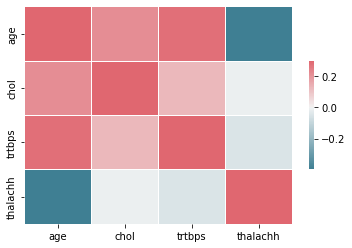

In [9]:
# Correlations between continuous variables with seaborn, 
# age impacts cholestoral, resting blood pressure, maximum heart rate achieved.
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','chol', 'trtbps', 'thalachh']].corr(),cmap=cmap,
            vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'kfold'],
      dtype='object')

Graph for cp: total = 4


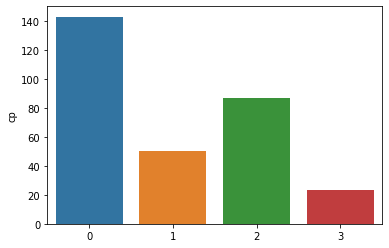

Graph for restecg: total = 3


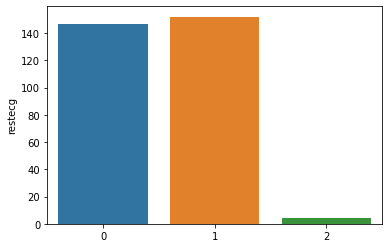

Graph for output: total = 2


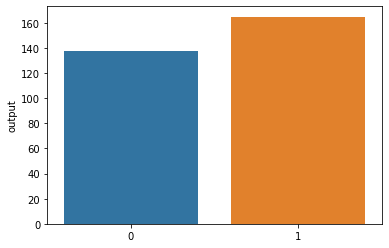

Graph for slp: total = 3


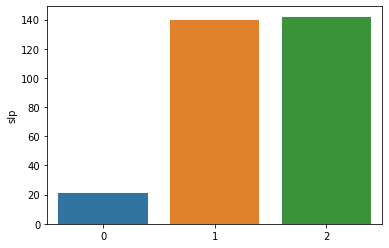

Graph for thall: total = 4


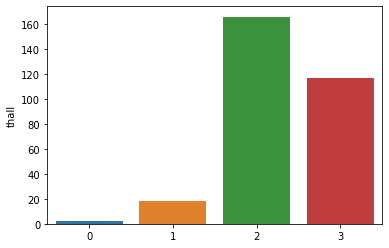

In [11]:
df_cat = df[['cp', 'restecg', 'output', 'slp', 'thall']]
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('Graph for %s: total = %d' % (i, len(cat_num)))
    sns.barplot(x=cat_num.index, y = cat_num)
    plt.show()

In [12]:
# Pivot tables
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'kfold'],
      dtype='object')

In [13]:
#Pivot table on chest pain and cholestoral level
pd.pivot_table(df, index = 'cp' , values = 'chol')

,chol
cp,
0,250.132867
1,244.780000
2,243.172414
3,237.130435


In [14]:
#Pivot table on rest_ecg and cholestoral level
pd.pivot_table(df, index = 'restecg' , values = 'chol')

,chol
restecg,
0,255.142857
1,237.269737
2,261.750000


In [15]:
#Pivot table including group by
pd.pivot_table(df, index = ['cp','restecg'] , values = 'chol', aggfunc=np.mean).sort_values('chol', ascending=False)

chol
cp restecg            
0  2        283.333333
   0        257.576923
2  0        257.555556
1  0        253.894737
   1        239.193548
0  1        239.161290
3  1        237.222222
   0        237.071429
2  1        233.740000
   2        197.000000